## Decision Surfaces

- **Goal**: visualize what classifiers actually produce
- see more at http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [1]:
%load_ext autoreload
%autoreload 2

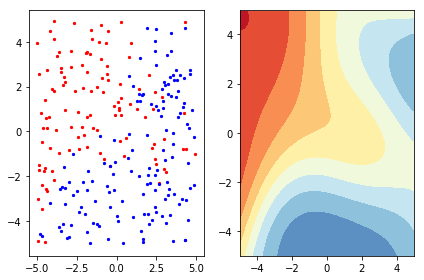

In [2]:
# First generate some data
import helper
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

x, y, TRUE_SURFACE = helper.gen_planar_samples(seed=1341)
plt.figure()
ax_l = plt.subplot(1, 2, 1)
helper.plot_red_blue(x, y, ax=ax_l)
ax_r = plt.subplot(1, 2, 2)
helper.plot_decision_surface(TRUE_SURFACE, ax=ax_r)

In [3]:
# let's load some classifiers
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# some interactive visualizations
# first, linear SVC: divide our data with a straight line, maximizing the amount they are separated by.
# when they are not separable, minimize the loss, i.e. sum of (square) distances into "enemy territory"
def plot_svc(lp):
    loss, penalty = lp.split('+')
    model = LinearSVC(loss=loss, penalty=penalty).fit(x, y)
    fig = helper.plot_decision_surface(model.decision_function, with_data=(x, y), with_true_surface=TRUE_SURFACE)
    
_ = interact(plot_svc,
         lp=widgets.RadioButtons(options=['squared_hinge+l2', 'hinge+l2']),
         # loss=widgets.RadioButtons(options=['hinge', 'squared_hinge']),
        )

interactive(children=(RadioButtons(description='lp', options=('squared_hinge+l2', 'hinge+l2'), value='squared_…

In [5]:
# in a specific sense, K nearest neighbours is theoretically "perfect"
# but it's also the most data hungry, and is completely useless in high dimensions

def plot_kn(kn):
    fig = plt.figure()
    model = KNeighborsClassifier(n_neighbors=kn).fit(x, y)
    fig = helper.plot_decision_surface(model.predict_proba, with_data=(x, y), with_true_surface=TRUE_SURFACE)
 

In [6]:
interact(plot_kn, kn=widgets.IntSlider(min=1,max=50,step=1,value=5));

interactive(children=(IntSlider(value=5, description='kn', max=50, min=1), Output()), _dom_classes=('widget-in…

In [7]:
# "rbf" stands for radial basis function; the RBF SVC implicitly projects the data into infinite dimensions
# without going into the mathematical specifics, think of it as generating a ball of matching colour around
# each point. The prediction is the the sum of these colours.
# It has the nice property that if we're very far away from our input data, the prediction approaches 50/50.

def plot_svc_rbf(gamma):
    model = SVC(kernel='rbf', gamma=gamma, probability=True).fit(x, y)
    fig = helper.plot_decision_surface(model.predict_proba, with_data=(x, y), with_true_surface=TRUE_SURFACE)

In [8]:
interact(plot_svc_rbf, gamma=widgets.FloatLogSlider(min=-2,max=1,step=0.25,value=3));

interactive(children=(FloatLogSlider(value=3.0, description='gamma', max=1.0, min=-2.0, step=0.25), Output()),…

In [9]:
# Divides the space into a bunch of rectangles following a tree of (if x > z) style rules
# Rarely used by itself; rather, many of these "averaged out" in a clever way produce a very good classifier
# We'll get to it later

def plot_decision_tree(max_depth, min_samples_split, criterion):
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split).fit(x, y)
    fig = helper.plot_decision_surface(model.predict_proba, with_data=(x, y), with_true_surface=TRUE_SURFACE)

In [10]:
interact(plot_decision_tree, max_depth=widgets.IntSlider(min=1,max=20,step=1,value=3),
        min_samples_split=widgets.IntSlider(min=2, max=20, step=1, values=3),
        criterion=widgets.RadioButtons(options=['gini', 'entropy']));

interactive(children=(IntSlider(value=3, description='max_depth', max=20, min=1), IntSlider(value=2, descripti…